In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
import numpy as np

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [3]:
train=pd.read_csv('labeledTrainData.tsv',delimiter='\t')
test=pd.read_csv('testData.tsv',delimiter='\t')

In [4]:
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [5]:
train['id'][0]

'5814_8'

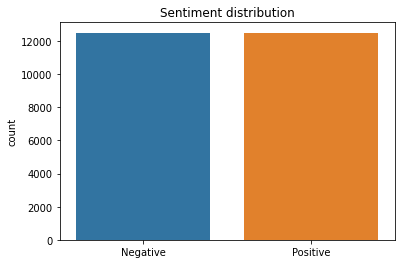

In [6]:
f = sns.countplot(x='sentiment', data=train)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("");

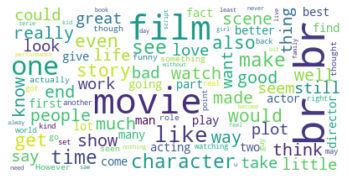

In [33]:
text=" ".join(review for review in train.review)
text_test=" ".join(review for review in test.review)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();


In [43]:
def clean(text):
    text=BeautifulSoup(text).get_text() 
    clean_text=re.sub("[^a-z\s]+"," ",text,flags=re.IGNORECASE) # + means whole word
    clean_text=clean_text.lower().split()
    stopwords_en=stopwords.words('english')
    meaningful_words = [w for w in clean_text if not w in stopwords_en]   
    return( " ".join( meaningful_words )) 
    
    

In [49]:

num_reviews = train["review"].size
Clean_train=[]
for i in range(0,num_reviews):
    Clean_train.append(clean(train["review"][i]))
    

In [72]:
num_reviews_test = test["review"].size
Clean_test=[]
for i in range(0,num_reviews_test):
    Clean_test.append(clean(test["review"][i]))

In [35]:
# test_test=clean(text_test)

In [53]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 5000)

In [54]:
train_vec = vectorizer.fit_transform(Clean_train).toarray() 


In [67]:
vocab = vectorizer.get_feature_names()

In [68]:
vocab

['abandoned',
 'abc',
 'abilities',
 'ability',
 'able',
 'abraham',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absurd',
 'abuse',
 'abusive',
 'abysmal',
 'academy',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accident',
 'accidentally',
 'accompanied',
 'accomplished',
 'according',
 'account',
 'accuracy',
 'accurate',
 'accused',
 'achieve',
 'achieved',
 'achievement',
 'acid',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'activities',
 'actor',
 'actors',
 'actress',
 'actresses',
 'acts',
 'actual',
 'actually',
 'ad',
 'adam',
 'adams',
 'adaptation',
 'adaptations',
 'adapted',
 'add',
 'added',
 'adding',
 'addition',
 'adds',
 'adequate',
 'admire',
 'admit',
 'admittedly',
 'adorable',
 'adult',
 'adults',
 'advance',
 'advanced',
 'advantage',
 'adventure',
 'adventures',
 'advertising',
 'advice',
 'advise',
 'affair',
 'affect',
 'affected',
 'afford',
 'aforementioned',
 'afraid',
 'africa',
 'african',
 'after

In [71]:
dist = np.sum(train_vec, axis=0)

for tag, count in zip(vocab, dist):
    print(count, tag)

187 abandoned
125 abc
108 abilities
454 ability
1259 able
85 abraham
116 absence
83 absent
352 absolute
1485 absolutely
306 absurd
192 abuse
91 abusive
98 abysmal
297 academy
485 accent
203 accents
300 accept
130 acceptable
144 accepted
92 access
318 accident
200 accidentally
88 accompanied
124 accomplished
296 according
186 account
81 accuracy
284 accurate
123 accused
179 achieve
139 achieved
124 achievement
90 acid
971 across
1251 act
658 acted
6490 acting
3354 action
311 actions
83 activities
2389 actor
4486 actors
1219 actress
369 actresses
394 acts
793 actual
4237 actually
148 ad
302 adam
98 adams
453 adaptation
80 adaptations
154 adapted
810 add
439 added
166 adding
347 addition
337 adds
113 adequate
124 admire
621 admit
134 admittedly
101 adorable
510 adult
376 adults
100 advance
90 advanced
153 advantage
510 adventure
204 adventures
91 advertising
259 advice
90 advise
346 affair
93 affect
113 affected
104 afford
126 aforementioned
343 afraid
212 africa
255 african
187 afternoon

192 demons
82 deniro
176 dennis
152 dentist
141 denzel
194 department
210 depicted
82 depicting
172 depiction
90 depicts
99 depressed
226 depressing
129 depression
511 depth
86 der
78 deranged
151 derek
89 descent
330 describe
233 described
102 describes
175 description
250 desert
287 deserve
291 deserved
591 deserves
342 design
206 designed
91 designs
304 desire
91 desired
86 despair
323 desperate
179 desperately
104 desperation
1364 despite
104 destiny
219 destroy
178 destroyed
94 destroying
142 destruction
345 detail
108 detailed
410 details
460 detective
164 determined
252 develop
404 developed
102 developing
641 development
144 develops
181 device
314 devil
104 devoid
109 devoted
769 dialog
142 dialogs
1542 dialogue
110 dialogues
125 diamond
101 diana
103 diane
295 dick
94 dickens
794 die
512 died
386 dies
376 difference
115 differences
2385 different
695 difficult
142 dig
126 digital
118 dignity
83 dimension
255 dimensional
82 din
154 dinner
99 dinosaur
111 dinosaurs
122 dire
366

3204 gets
1627 getting
484 ghost
181 ghosts
118 giallo
379 giant
131 gift
84 gifted
107 ginger
2853 girl
636 girlfriend
1211 girls
3376 give
1846 given
1576 gives
839 giving
450 glad
157 glass
80 glasses
118 glenn
149 glimpse
94 global
104 glorious
147 glory
142 glover
5157 go
137 goal
1207 god
134 godfather
105 godzilla
2441 goes
4101 going
295 gold
123 goldberg
259 golden
754 gone
241 gonna
15140 good
106 goodness
161 goofy
245 gordon
1038 gore
368 gorgeous
234 gory
3583 got
136 gothic
129 gotta
286 gotten
424 government
109 grab
80 grabs
328 grace
462 grade
118 gradually
86 graham
307 grand
98 grandfather
127 grandmother
262 grant
201 granted
239 graphic
169 graphics
97 grasp
237 gratuitous
189 grave
121 gray
89 grayson
9058 great
174 greater
745 greatest
154 greatly
82 greatness
86 greed
91 greedy
113 greek
404 green
83 greg
79 gregory
250 grew
158 grey
79 grief
102 griffith
188 grim
103 grinch
150 gripping
196 gritty
180 gross
353 ground
1034 group
108 groups
224 grow
297 growing


156 matthau
115 matthew
182 mature
215 max
3386 may
2340 maybe
96 mayor
83 mclaglen
1683 mean
473 meaning
144 meaningful
108 meaningless
761 means
614 meant
249 meanwhile
104 measure
127 meat
85 mechanical
305 media
152 medical
365 mediocre
132 medium
668 meet
237 meeting
677 meets
119 mel
188 melodrama
122 melodramatic
101 melting
327 member
552 members
666 memorable
279 memories
306 memory
1909 men
100 menace
126 menacing
309 mental
160 mentally
811 mention
564 mentioned
85 mentioning
85 mentions
181 mere
359 merely
112 merit
81 merits
83 meryl
641 mess
829 message
131 messages
91 messed
286 met
189 metal
81 metaphor
103 method
85 methods
184 mexican
185 mexico
199 mgm
1333 michael
172 michelle
108 mickey
319 mid
956 middle
178 midnight
2919 might
87 mighty
132 miike
281 mike
133 mild
174 mildly
115 mildred
123 mile
260 miles
462 military
79 milk
104 mill
169 miller
397 million
79 millionaire
149 millions
91 min
1995 mind
162 minded
154 mindless
185 minds
275 mine
213 mini
119 minima

510 recent
579 recently
90 recognition
195 recognize
113 recognized
1667 recommend
489 recommended
283 record
104 recorded
85 recording
819 red
326 redeeming
143 redemption
118 reduced
163 reed
88 reel
166 reference
249 references
92 reflect
81 reflection
206 refreshing
78 refused
154 refuses
166 regard
174 regarding
125 regardless
189 regret
266 regular
86 reid
235 relate
202 related
94 relation
102 relations
966 relationship
361 relationships
126 relative
213 relatively
89 relatives
78 relax
807 release
986 released
132 relevant
242 relief
106 relies
238 religion
310 religious
209 remain
78 remained
120 remaining
439 remains
583 remake
309 remarkable
105 remarkably
91 remarks
1702 remember
258 remembered
157 remind
347 reminded
297 reminds
175 reminiscent
163 remote
189 remotely
108 removed
90 rendition
719 rent
214 rental
337 rented
177 renting
143 repeat
204 repeated
119 repeatedly
123 repetitive
162 replaced
96 report
213 reporter
103 represent
99 represented
132 represents
191 re

In [74]:
test_vec = vectorizer.transform(Clean_test)

In [77]:
forest = RandomForestClassifier(n_estimators = 100) 

In [78]:
forest = forest.fit( train_vec, train["sentiment"] )

In [79]:
result = forest.predict(test_vec)

In [93]:
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

In [96]:
output.to_csv( "output.csv", index=False, quoting=3 )

0.92452